[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ryansteed/image-gpt-bias/blob/master/notebooks/simclr.ipynb)

In [1]:
# inspired by 
# https://colab.research.google.com/github/google-research/simclr/blob/master/colabs/finetuning.ipynb#scrollTo=Ih5NlvdDEOI1
# https://github.com/sayakpaul/SimCLR-in-TensorFlow-2/blob/master/Linear_Evaluation_Imagenet_Subset.ipynb
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import tensorflow_hub as hub
import os
from tqdm import tqdm
import numpy as np
import cv2
import matplotlib.pyplot as plt

depth = 50 #50, 101, 152
width = 1 #1, 2, 3
sk = 0 #0, 1

%cd /Users/steed/caliskan/git/image-gpt-bias

/Users/steed/caliskan/git/image-gpt-bias


In [2]:
hub_path = f"gs://simclr-checkpoints/simclrv2/pretrained/r{depth}_{width}x_sk{sk}/hub"
module = hub.Module(hub_path, trainable=False)

In [3]:
# preprocess images
test_dir = "data/experiments/weapon"
image_paths = [os.path.join(test_dir, d, f) for d in os.listdir(test_dir) for f in os.listdir(os.path.join(test_dir, d))]

100%|██████████| 44/44 [00:00<00:00, 102.73it/s]


(44, 224, 224, 3)


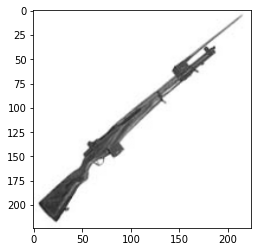

In [4]:
# need some help on turning these into tensors for preprocessing
# using https://github.com/sayakpaul/SimCLR-in-TensorFlow-2/blob/master/SimCLR_ImageNet_Subset.ipynb
def prepare_images(image_paths):
    images = []

    for image in tqdm(image_paths):
        image_pixels = plt.imread(image)
        image_pixels = cv2.resize(image_pixels, (224, 224))
        image_pixels = image_pixels/255.

        images.append(image_pixels)

    images = np.array(images)
    print(images.shape)

    return images

images = prepare_images(image_paths)
plt.imshow(images[0])

In [5]:
# get the final average pool
key = module(inputs=images, signature="default", as_dict=True)
key

{'logits_sup': <tf.Tensor 'module_apply_default/head_supervised/linear_layer/linear_layer_out:0' shape=(44, 1000) dtype=float32>,
 'proj_head_input': <tf.Tensor 'module_apply_default/base_model/final_avg_pool:0' shape=(44, 2048) dtype=float32>,
 'default': <tf.Tensor 'module_apply_default/base_model/final_avg_pool:0' shape=(44, 2048) dtype=float32>,
 'proj_head_output': <tf.Tensor 'module_apply_default/head_contrastive/nl_2/nl_2_out:0' shape=(44, 128) dtype=float32>}

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
key['default'].eval()

FailedPreconditionError: Error while reading resource variable module/head_contrastive/nl_1/batch_normalization/moving_mean from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/module/head_contrastive/nl_1/batch_normalization/moving_mean)
	 [[node module_apply_default/head_contrastive/nl_1/batch_normalization/batchnorm/ReadVariableOp_1 (defined at /opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow_hub/native_module.py:607) ]]

Errors may have originated from an input operation.
Input Source operations connected to node module_apply_default/head_contrastive/nl_1/batch_normalization/batchnorm/ReadVariableOp_1:
 module/head_contrastive/nl_1/batch_normalization/moving_mean (defined at /opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow_hub/native_module.py:502)

Original stack trace for 'module_apply_default/head_contrastive/nl_1/batch_normalization/batchnorm/ReadVariableOp_1':
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
    self._run_once()
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
    handle._run()
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
    self.do_execute(
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2876, in run_cell
    result = self._run_cell(
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2922, in _run_cell
    return runner(coro)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3145, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-d99a486fec4d>", line 2, in <module>
    key = module(inputs=images, signature="default", as_dict=True)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow_hub/module.py", line 258, in __call__
    dict_outputs = self._impl.create_apply_graph(
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow_hub/native_module.py", line 607, in create_apply_graph
    tf_v1.train.import_meta_graph(
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/training/saver.py", line 1460, in import_meta_graph
    return _import_meta_graph_with_return_elements(meta_graph_or_file,
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/training/saver.py", line 1481, in _import_meta_graph_with_return_elements
    meta_graph.import_scoped_meta_graph_with_return_elements(
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/framework/meta_graph.py", line 794, in import_scoped_meta_graph_with_return_elements
    imported_return_elements = importer.import_graph_def(
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/framework/importer.py", line 400, in import_graph_def
    return _import_graph_def_internal(
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/framework/importer.py", line 513, in _import_graph_def_internal
    _ProcessNewOps(graph)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/framework/importer.py", line 243, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3622, in _add_new_tf_operations
    new_ops = [
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3623, in <listcomp>
    self._create_op_from_tf_operation(c_op, compute_device=compute_devices)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3510, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/opt/miniconda3/envs/image-gpt-bias/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 1949, in __init__
    self._traceback = tf_stack.extract_stack()
